## IMDb India Movies

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding = 'latin')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# shape of the data
df.shape

# 15509 rows and 10 columns

(15509, 10)

In [4]:
# datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### 5- point Summary for numerical variables

In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### 5- point Summary for categorical variables

In [6]:
df.describe(include = 'object')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


### Data pre-processing

In [7]:
# removing bracket from year column

df['Year'] = df['Year'].str.replace(r'\(|\)', '')

In [8]:
# removing 'min' from the column

df['Duration'] = df['Duration'].str.replace(' min', '')

In [9]:
df['Votes'] = df['Votes'].str.replace(',', '')
df['Votes'] = df['Votes'].str.replace('$', '')
df['Votes'] = df['Votes'].str.replace('M', '')

### Changing the datatype of wrongly identified columns

In [10]:
df['Rating'] = df['Rating'].astype(np.number)
df['Votes'] = df['Votes'].astype(np.number)
df['Duration'] = df['Duration'].astype(np.number)

### null values

In [11]:
# null values

val = df.isnull().sum()
per = (df.isnull().sum()/len(df))*100

null = pd.DataFrame([val,per],index = ['null values','Percentage of null values'])
null

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
null values,0.0,528.000000,8269.000000,1877.00000,7590.000000,7589.000000,525.000000,1617.000000,2384.00000,3144.0000
Percentage of null values,0.0,3.404475,53.317429,12.10265,48.939326,48.932878,3.385131,10.426204,15.37172,20.2721


In [12]:
df.dropna(subset=['Year'],inplace=True)
df.dropna(subset=['Genre'],inplace=True)

In [13]:
df.isnull().sum()

Name           0
Year           0
Duration    6208
Genre          0
Rating      5323
Votes       5322
Director     481
Actor 1     1111
Actor 2     1539
Actor 3     2054
dtype: int64

In [14]:
# making the nan to 0
df['Rating'].fillna(0, inplace = True)
df['Duration'].fillna(df['Duration'].mean(),inplace=True)
df['Votes'].fillna(df['Votes'].median(),inplace=True)

In [15]:
df.isnull().sum()

Name           0
Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director     481
Actor 1     1111
Actor 2     1539
Actor 3     2054
dtype: int64

### 5-point summary after changing the datatype

In [16]:
df.describe()

,Duration,Rating,Votes
count,13140.000000,13140.000000,13140.000000
mean,128.193162,3.473965,1191.260591
std,20.997179,3.058420,9053.790894
min,2.000000,0.000000,5.000000
25%,128.193162,0.000000,37.750000
50%,128.193162,4.400000,57.000000
75%,133.000000,6.300000,94.250000
max,321.000000,10.000000,591417.000000


### Univarite analysis

In [17]:
num = df.select_dtypes(np.number)

Year        -0.598899
Duration    -0.297563
Rating      -0.055579
Votes       32.444220
dtype: float64


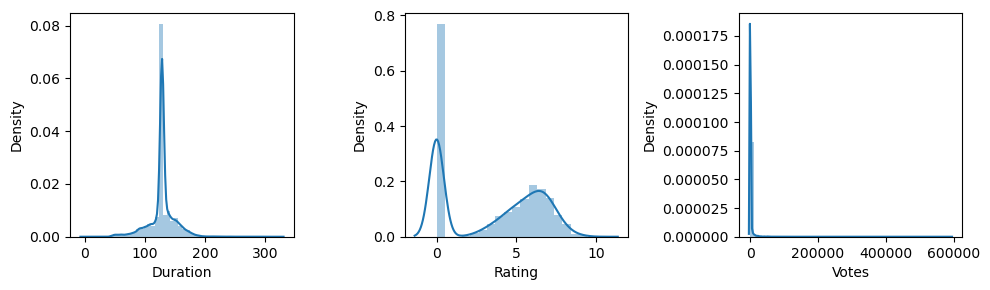

In [18]:
fig, ax = plt.subplots(1,3, figsize = (10,3))

for i, subplot in zip(num, ax .flatten()):
    sns.distplot(df[i], ax = subplot)
    
print(df.skew())
plt.tight_layout()
plt.show()

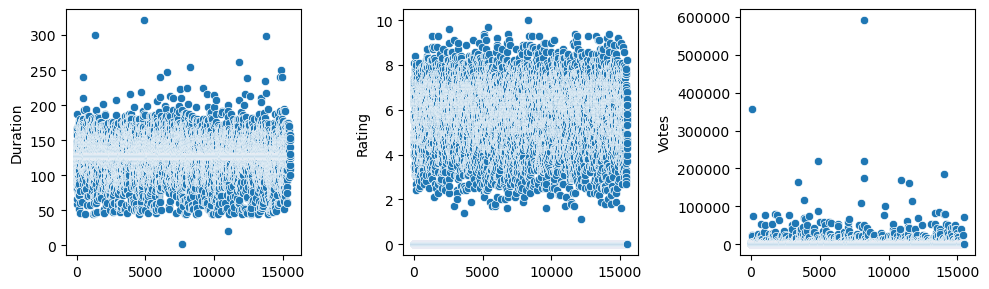

In [19]:
fig, ax = plt.subplots(1,3, figsize = (10,3))

for i, subplot in zip(num, ax .flatten()):
    sns.scatterplot(df[i], ax = subplot)
    
plt.tight_layout()
plt.show()

### Bivariate Analysis

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (10,3))

for i, subplot in zip(num, ax .flatten()):
    sns.scatterplot(x = df[i],y =df['Rating'], ax = subplot)
    
plt.tight_layout()
plt.show()

In [ ]:
sns.barplot(data = df, x = 'Year', y = 'Rating')
#plt.xticks(rotation = 90)
plt.show()

In [ ]:
sns.scatterplot(data = df, x = 'Votes',y = 'Rating')
plt.show()

### Heatmap

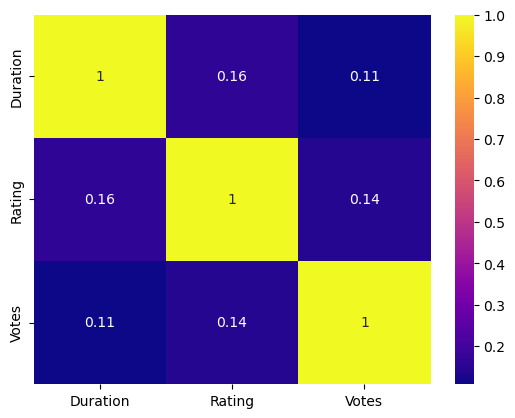

In [21]:
sns.heatmap(df.corr(),annot=True,cmap = 'plasma')
plt.show()

### Droping Irrelavent columns

In [22]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

In [23]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

### Outlier Treatment

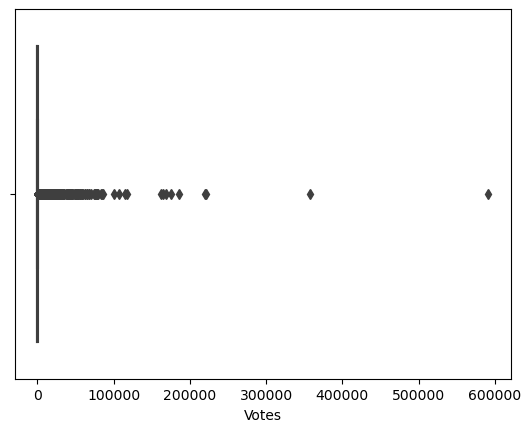

In [25]:
sns.boxplot(data = df, x = 'Votes')
plt.show()

In [26]:
q1 = df['Votes'].quantile(0.25)
q3 = df['Votes'].quantile(0.75)
IQR = q3 - q1

lower_whisker = q1 -(1.5*IQR)
upper_whisker = q3 + (1.5*IQR)
df['Votes']=np.where(df['Votes']>upper_whisker,upper_whisker,
                      np.where(df['Votes']<lower_whisker,lower_whisker,df['Votes']))

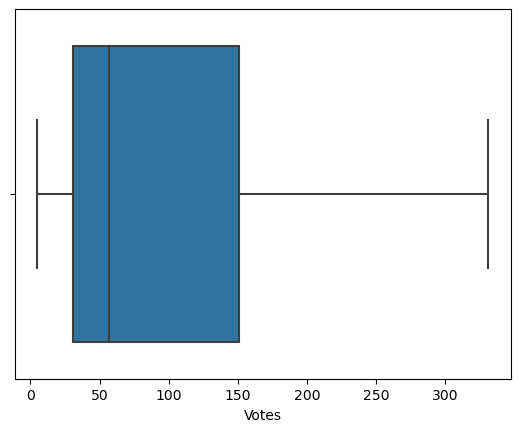

In [27]:
sns.boxplot(data = df, x = 'Votes')
plt.show()

### Encoding

In [28]:
df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']

{'A. Muthu': 3.3,
 'A. Nairang': 6.1,
 'A.K. Hangal': 2.066666666666667,
 'A.K. Misra': 6.1,
 'A.S. Ravindra Babu': 4.8,
 'Aachi Manorama': 2.4,
 'Aadar Jain': 5.6,
 'Aadhi': 6.6,
 'Aadi Jain': 0.0,
 'Aadil Abedi': 6.7,
 'Aadil Chahal': 5.6,
 'Aaditya Pratap Singh': 0.0,
 'Aadya Bedi': 0.0,
 'Aafreen': 0.0,
 'Aahana Kumra': 6.8,
 'Aajesh Rekhi': 0.0,
 'Aakansha Kadre': 0.0,
 'Aakar Kaushik': 6.2,
 'Aakash': 3.9,
 'Aakash Dabhade': 0.0,
 'Aakash Pandey': 0.0,
 'Aakriti Bisaria': 0.0,
 'Aalam': 6.7,
 'Aaloka': 5.800000000000001,
 'Aamani': 0.0,
 'Aamir': 4.3,
 'Aamir Bashir': 4.675,
 'Aamir Khan': 6.827272727272728,
 'Aanchal Dwivedi': 6.7,
 'Aarti Chhabria': 5.0,
 'Aarvi Aruna': 0.0,
 'Aaryaman Pratap Kushwaha': 0.0,
 'Aaryan': 4.8,
 'Aaryan Adhikari': 6.8,
 'Aashika': 0.0,
 'Aashish Bhatt': 6.6,
 'Aashish Chaudhary': 5.8,
 'Aashish Kaul': 3.6,
 'Aashit Chatterjee': 0.0,
 'Aasif Sheikh': 2.2,
 'Aatish Devgan': 4.85,
 'Aayush Shah': 4.4,
 'Aban Raza': 5.6,
 'Abbas': 3.8499999999999996,
 

In [29]:
director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

### Train Test Split

In [30]:
 from sklearn.model_selection import train_test_split

In [31]:
X = df[['Votes', 'Duration','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=24)

In [32]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape 

((7760, 6), (3326, 6), (7760,), (3326,))

### Model Building

In [44]:
perf_score = pd.DataFrame(columns=['Model', 'Alpha', 'L1_Ratio','R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE' ] )

def per_measures(model):
   # calculate rsquare value
    rsq_train = model.score(xtrain, ytrain)
    rsq_test  = model.score(xtest, ytest)

    # calculating adjusted rsquare value
    n =xtrain.shape[0]
    k = xtrain.shape[1]
    rsq_adj = 1 - ((1-rsq_test)*(n-1)/(n-k-1))


    model.fit(xtrain,ytrain)
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))
    MAPE_test = (np.mean(np.abs((ytest - pred_test) / ytest)) )
    return (rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)

In [45]:
def update_performance (name, model, alpha = '-', l1_ratio = '-' ):

    global perf_score
    perf_score = perf_score.append({'Model'          : name,
                                    'Alpha'          : alpha,
                                    'L1_Ratio'       : l1_ratio,
                                    'R2_Train'       : per_measures(model)[0],
                                    'R2_Test'        : per_measures(model)[1],    
                                    'RMSE Train'     : per_measures(model)[2],
                                    'RMSE TEST'      : per_measures(model)[3],
                                    'MAPE'           : per_measures(model)[4]
                                    },
                                   ignore_index = True)
    
    # the [1],[2] .... is coming from the user defined functon made above
    # in return R2_Train is at index 0 , so we are giving [0]
    # R2_Test is at index 1, so [1]

### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
lr = LinearRegression()
model_lr = lr.fit(xtrain,ytrain)

pred_train = model_lr.predict(xtrain)
pred_test = model_lr.predict(xtest)

print(model_lr.score(xtest, ytest))

0.8004534104336385


In [35]:
print(np.sqrt(mean_squared_error(ytest, pred_test)))
print(np.sqrt(mean_squared_error(ytrain, pred_train)))

1.2996355081554483
1.354570259678006


In [46]:
update_performance(name = 'Linear Regression ', model = model_lr)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.78816,0.800453,1.35457,1.299636,inf


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(xtrain,ytrain)
pred_train = rf_model.predict(xtrain)
pred_test = rf_model.predict(xtest)
print(rf.score(xtest, ytest))

0.931935317255687


In [37]:
print(np.sqrt(mean_squared_error(ytest, pred_test)))
print(np.sqrt(mean_squared_error(ytrain, pred_train)))

0.7590324198422735
0.2860019032450549


In [47]:
update_performance(name = 'Random Forest Regressor ', model = rf_model)

perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.788160,0.800453,1.354570,1.299636,inf
1,Random Forest Regressor,-,-,0.990556,0.931578,0.287008,0.757813,inf


### DecisionTreeRegressor

In [48]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_dt=dt.fit(xtrain,ytrain)

pred_train = model_dt.predict(xtrain)
pred_test = model_dt.predict(xtest)

In [49]:
update_performance(name = 'Decision Tree ', model = model_dt)
perf_score

,Model,Alpha,L1_Ratio,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,Linear Regression,-,-,0.788160,0.800453,1.354570e+00,1.299636,inf
1,Random Forest Regressor,-,-,0.990556,0.931578,2.870084e-01,0.757813,inf
2,Decision Tree,-,-,1.000000,0.861031,1.997511e-16,1.079801,inf


#### Random Forest model is performing best with least rmse and the model is nor overfit or underfit